# 1. Web Scraping

In [2]:
from bs4 import BeautifulSoup
import requests
import time, os
import pandas as pd
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.common.by import By
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.action_chains import ActionChains
from selenium.common.exceptions import NoSuchElementException
from selenium.common.exceptions import StaleElementReferenceException
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions
import numpy as np
import warnings
warnings.filterwarnings("ignore")
df1=pd.DataFrame()
lst_dict = []

In [80]:
from selenium import webdriver
from selenium.webdriver.common.keys import Keys

chromedriver = "/Users/reefalturki/Downloads/chromedriver" # path to the chromedriver executable
os.environ["webdriver.chrome.driver"] = chromedriver

## Cars.com

In [81]:
chromeOptions = webdriver.ChromeOptions()
prefs = {"profile.managed_default_content_settings.images": 2}
chromeOptions.add_experimental_option("prefs", prefs)
driver = webdriver.Chrome(chromedriver, chrome_options=chromeOptions)
webpage = "https://www.cars.com/"
driver.get(webpage)

<ipython-input-81-3e5b76fabfaa>:4: DeprecationWarning: use options instead of chrome_options
  driver = webdriver.Chrome(chromedriver, chrome_options=chromeOptions)


In [82]:
soup = BeautifulSoup(driver.page_source, 'html.parser')

In [83]:
date_element = driver.find_element_by_xpath(f'//*[@id="make-model-search-stocktype"]/option[4]')
date_element.click()

In [84]:
date_element = driver.find_element_by_xpath(f'//*[@id="by-make-tab"]/div/div[7]/button')
date_element.click()

Browse through pages and extract data

In [85]:
df1=pd.DataFrame()
columns=['Name','Year','Manufacturer','State','Color','Fuel type','Transmission','Engine','VIN','Mileage','Price']
driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
lst_dict=[]
counter=0
while True:
    WebDriverWait(driver, 5).until(EC.presence_of_all_elements_located((By.CLASS_NAME, "vehicle-card-visited-tracking-link")))
    for car in driver.find_elements_by_class_name("vehicle-card-visited-tracking-link"):
        vals=[]
        driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
        try:
            url=car.get_attribute('href')
        except StaleElementReferenceException:
            continue
        r = requests.get(url)
        soap = BeautifulSoup(r.content)
        soap1=soap.find('dl',class_="fancy-description-list")
        if soap1:
            soap1=soap.find('dl',class_="fancy-description-list").find_all('dd')
        else:
            continue 
        # extract the car's data
        Name=soap.find('h1',class_='listing-title').text
        splitting=Name.split()
        name= splitting[2:]
        name= ' '.join(word for word in name)
        vals.append(name)
        year= splitting[0]
        vals.append(year)
        manufacturer= splitting[1]
        vals.append(manufacturer)
        soap2=soap.find('div',class_="dealer-address")
        if soap2:
            element=soap2.text.split()
            vals.append(element[-2])
        else:
            vals.append(np.NaN)
        color=soap1[0].text.strip()
        vals.append(color)
        FuleType=soap1[4].text
        vals.append(FuleType)
        Transmission=soap1[5].text
        vals.append(Transmission)
        Engine=soap1[6].text
        vals.append(Engine)
        VIN=soap1[7].text.strip()
        vals.append(VIN)
        Mileage=soap1[9].text.strip()
        vals.append(Mileage)
        price=soap.find(class_="primary-price").text
        vals.append(price)
        lst_dict.append(dict(zip(columns, vals)))
    counter+=1
    if counter==500:
        break
    driver.get(WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.XPATH, '//*[@id="next_paginate"]'))).get_attribute('href'))
        
df1=df1.append(lst_dict)

In [87]:
df1.head(50)

,Name,Year,Manufacturer,State,Color,Fuel type,Transmission,Engine,VIN,Mileage,Price
0,AMG C 43 Base 4MATIC,2019,Mercedes-Benz,CA,Black,Gasoline,9-Speed Automatic,3.0L V6 24V GDI DOHC Twin Turbo,55SWF6EB8KU291212,"24,076 mi.","$54,392"
1,Terrain SLT,2018,GMC,TN,Graphite Gray Metallic,Gasoline,9-Speed Automatic,2.0L I4 16V GDI DOHC Turbo,3GKALVEX1JL336991,"45,278 mi.","$26,659"
2,Romeo Stelvio Ti,2018,Alfa,PA,Vulcano Black Metallic,Gasoline,8-Speed Automatic,2.0L I4 16V GDI SOHC Turbo,ZASFAKNN5J7B93222,"13,690 mi.","$34,998"
3,Aviator Reserve AWD,2020,Lincoln,WI,Blue Diamond,Gasoline,10-Speed Automatic,3.0L V6 24V GDI DOHC Twin Turbo,5LM5J7XC1LGL24283,"3,104 mi.","$55,995"
4,XC60 T6 Momentum,2021,Volvo,WA,Fusion Red Metallic,Gasoline,8-Speed Automatic,2.0L I4 16V GDI DOHC,YV4A22RK1M1777654,"18,378 mi.","$46,880"
5,Wrangler Unlimited Sahara,2020,Jeep,SC,Billet Silver Metallic Clearcoat,Gasoline,8-Speed Automatic,2.0L I4 16V GDI DOHC Turbo,1C4HJXEN7LW204339,"48,942 mi.","$41,889"
6,CX-5 Touring,2020,Mazda,FL,Snowflake White Pearl,Gasoline,6-Speed Automatic,2.5L I4 16V GDI DOHC,JM3KFBCM3L0777706,"49,937 mi.","$22,939"
7,GLC 300 Base 4MATIC,2020,Mercedes-Benz,CA,Iridium Silver Metallic,Gasoline,Automatic,Intercooled Turbo Premium Unleaded I-4 2.0 L/121,WDC0G8EB5LF699139,"14,317 mi.","$45,991"
8,LC 500 Base,2018,Lexus,MD,Caviar,Gasoline,10-Speed Automatic,5.0L V8 32V PDI DOHC,JTHHP5AY5JA003020,"65,360 mi.","$67,390"
9,Fusion SEL,2020,Ford,UT,Oxford White,Gasoline,6-Speed Automatic,1.5L I4 16V GDI DOHC Turbo,3FA6P0CD9LR206514,"48,712 mi.","$20,489"


In [89]:
print(df1.duplicated(['Name','Year','Manufacturer','State','Color','Fuel type','Transmission','Engine','VIN','Mileage','Price']).value_counts())

False    9953
True        6
dtype: int64


Since the web scrapping took a long time, it's better to save it to .csv file for future usage

In [149]:
df1.to_csv('cars.csv', index=False)

read scrapped data from .csv file

In [3]:
df1=pd.DataFrame()
df1=pd.read_csv('cars.csv')

In [4]:
df1.shape

(9959, 11)

In [5]:
df1.columns

Index(['Name', 'Year', 'Manufacturer', 'State', 'Color', 'Fuel type',
       'Transmission', 'Engine', 'VIN', 'Mileage', 'Price'],
      dtype='object')

In [6]:
print(df1.duplicated(['Name','Year','Manufacturer','State','Color','Fuel type','Transmission','Engine','VIN','Mileage','Price']).value_counts())

False    9953
True        6
dtype: int64


In [7]:
df1['Fuel type'].unique()

array(['Gasoline ', 'Electric ', 'Hybrid ', 'Diesel ', 'E85 Flex Fuel ',
       '– ', 'Flexible Fuel ', 'Gasoline Fuel '], dtype=object)

In [8]:
df1['Fuel type']=df1['Fuel type'].str.strip()
df1['Fuel type'].replace({'Gasoline Fuel': 'Gasoline', 'E85 Flex Fuel': 'Flexible','Flexible Fuel':'Flexible','–':np.NaN}, inplace=True)

In [9]:
df1['Fuel type'].unique()

array(['Gasoline', 'Electric', 'Hybrid', 'Diesel', 'Flexible', nan],
      dtype=object)

In [10]:
df1['Transmission'].unique()

array(['9-Speed Automatic', '8-Speed Automatic', '10-Speed Automatic',
       '6-Speed Automatic', 'Automatic',
       '7-Speed Automatic with Auto-Shift',
       '8-Speed Automatic with Auto-Shift', '7-Speed Automatic',
       'Automatic CVT',
       '7-speed automatic driver-adaptive transmission-inc',
       '6-Speed Manual', '1-Speed Automatic', '5-Speed Automatic',
       'Sport Automatic', 'Variable', '6-Speed',
       '7-Speed Automatic with Overdrive', '4-Speed Automatic',
       'Lineartronic continuously variable transmission (CVT) -inc',
       '4-Speed Automatic with Overdrive',
       '6-Speed Automatic with Tiptronic',
       '6-speed automatic transmission w/SelectShift', '–',
       '5-speed automatic electronically controlled transmission w/intel',
       '5-speed ECT automatic transmission w/OD',
       '9-Speed 948TE Automatic',
       '6-speed ECT-i automatic transmission-inc', 'ZF 8-Speed Automatic',
       '6-Speed Automatic with Auto-Shift',
       'Transmission,

In [11]:
print(df1['Transmission'].value_counts())

8-Speed Automatic                             3117
6-Speed Automatic                             2160
Automatic CVT                                 1054
9-Speed Automatic                              800
10-Speed Automatic                             596
                                              ... 
Auto                                             1
5-speed automatic transmission w/OD-inc          1
7-Speed Automatic w/Manual Shift Mode -inc       1
Auto, 8-Spd w/SM                                 1
9-Speed 948TE Automatic                          1
Name: Transmission, Length: 116, dtype: int64


Change the **format** of Transmission column

In [12]:
df1['Transmission'][(df1['Transmission'].str.contains('CVT', case=False))]='CVT'
df1['Transmission'][(df1['Transmission'].str.contains('Variable', case=False))]='CVT'
df1['Transmission'][(df1['Transmission'].str.contains('Automatic', case=False))]='Automatic'
df1['Transmission'][(df1['Transmission'].str.contains('Auto', case=False))]='Automatic'
df1['Transmission'][(df1['Transmission'].str.contains('A/T', case=False))]='Automatic'
df1['Transmission'][(df1['Transmission'].str.contains('manual', case=False))]='Manual'
df1['Transmission']=df1['Transmission'].replace('–',np.nan)

In [13]:
print(df1['Transmission'].value_counts())

Automatic                                                         8681
CVT                                                               1101
Manual                                                             149
6-Speed                                                              7
7-Speed                                                              3
Single-Speed Fixed Gear                                              1
Engine, 3.6L V6 VVT (255 HP [190.2 kW] @ 6500 rpm, 254 lb.-ft.       1
Name: Transmission, dtype: int64


Drop rows which doesn't belong to standard format

In [14]:
# drop all other rows
df1 = df1[df1.Transmission.isin(['Automatic', 'CVT','Manual',np.NaN])]

In [15]:
print(df1['Transmission'].value_counts())

Automatic    8681
CVT          1101
Manual        149
Name: Transmission, dtype: int64


In [16]:
df1['Transmission'].unique()

array(['Automatic', 'CVT', 'Manual', nan], dtype=object)

Change the format of Engine column to match the one in additional dataset

In [17]:
df1['Engine'].unique()

array(['3.0L V6 24V GDI DOHC Twin Turbo', '2.0L I4 16V GDI DOHC Turbo',
       '2.0L I4 16V GDI SOHC Turbo', '2.0L I4 16V GDI DOHC',
       '2.5L I4 16V GDI DOHC',
       'Intercooled Turbo Premium Unleaded I-4 2.0 L/121',
       '5.0L V8 32V PDI DOHC', '1.5L I4 16V GDI DOHC Turbo',
       '2.0L I4 16V PDI DOHC Turbo', '2.0L I4 16V MPFI DOHC',
       '3.0L V6 24V GDI DOHC Supercharged', '3.6L V6 24V GDI DOHC',
       '3.5L V6 24V MPFI DOHC', '2.4L I4 16V GDI DOHC',
       '3.5L V6 24V MPFI SOHC', '2.9L V6 24V GDI DOHC Twin Turbo',
       '6.2L V8 16V GDI OHV', '2.5L I4 16V PDI DOHC',
       '2.4L I4 16V MPFI SOHC', '3.6L V6 24V MPFI DOHC',
       '4.6L V8 32V MPFI DOHC', '3.5L V6 24V GDI DOHC',
       '4.6L V8 32V PDI DOHC', '3.0L V6 24V GDI DOHC Turbo',
       '3.0L I6 24V GDI DOHC Twin Turbo', '5.3L V8 16V GDI OHV',
       '5.0L SOHC SMPI 24-valve V8 engine',
       '6.2L V8 16V GDI OHV Supercharged', '3.5L V6 24V PDI DOHC',
       '4.0L V8 32V GDI DOHC Twin Turbo', 'Electric',
     

In [18]:
import re
def func1(x):
    if x==None:
        return np.NaN
    match1 = re.search(r"V\d{1,2}|I\d{1,2}|I-\d{1,2}|V-\d{1,2}|\d{1,2}-Cylinder|\d{1,2} Cylinder|\d{1,2}-cylinder", x)
    if match1==None:
        return np.NaN
    x=re.search(r"\d{1,2}", match1.group(0))
    x=x.group(0)+' Cylinders'
    return x

In [19]:
df1['Engine']=df1['Engine'].apply(lambda x: func1(x))

In [20]:
df1['Engine'].unique()

array(['6 Cylinders', '4 Cylinders', '8 Cylinders', nan, '5 Cylinders',
       '10 Cylinders', '3 Cylinders', '12 Cylinders'], dtype=object)

In [21]:
df1['Engine'].value_counts()

6 Cylinders     4011
4 Cylinders     3699
8 Cylinders     1819
5 Cylinders       18
3 Cylinders       13
10 Cylinders       6
12 Cylinders       3
Name: Engine, dtype: int64

Explore and change (if necessary ) datatypes

In [22]:
df1.dtypes

Name            object
Year             int64
Manufacturer    object
State           object
Color           object
Fuel type       object
Transmission    object
Engine          object
VIN             object
Mileage         object
Price           object
dtype: object

In [23]:
df1['Year']=df1['Year'].astype(int)

In [24]:
df1['Mileage']=df1['Mileage'].str.replace(' mi.','').str.replace(',','')
df1['Mileage']=df1['Mileage'].replace('–',0)
df1['Mileage']=df1['Mileage'].astype(float)

In [25]:
df1['Price']=df1['Price'].str.replace('$','').str.replace(',','')
df1['Price']=df1['Price'].replace('Not Priced',0)
df1['Price']=df1['Price'].astype(int)

In [26]:
df1

,Name,Year,Manufacturer,State,Color,Fuel type,Transmission,Engine,VIN,Mileage,Price
0,AMG C 43 Base 4MATIC,2019,Mercedes-Benz,CA,Black,Gasoline,Automatic,6 Cylinders,55SWF6EB8KU291212,24076.0,54392
1,Terrain SLT,2018,GMC,TN,Graphite Gray Metallic,Gasoline,Automatic,4 Cylinders,3GKALVEX1JL336991,45278.0,26659
2,Romeo Stelvio Ti,2018,Alfa,PA,Vulcano Black Metallic,Gasoline,Automatic,4 Cylinders,ZASFAKNN5J7B93222,13690.0,34998
3,Aviator Reserve AWD,2020,Lincoln,WI,Blue Diamond,Gasoline,Automatic,6 Cylinders,5LM5J7XC1LGL24283,3104.0,55995
4,XC60 T6 Momentum,2021,Volvo,WA,Fusion Red Metallic,Gasoline,Automatic,4 Cylinders,YV4A22RK1M1777654,18378.0,46880
...,...,...,...,...,...,...,...,...,...,...,...
9954,Tahoe LT,2015,Chevrolet,IN,Summit White,Gasoline,Automatic,8 Cylinders,1GNSKBKC4FR241349,110228.0,31995
9955,NX 300 Base,2021,Lexus,DE,Nebula Gray Pearl,Gasoline,Automatic,4 Cylinders,JTJGARDZ1M2241517,11994.0,41993
9956,X5 xDrive35i,2018,BMW,TX,Mineral White Metallic,Gasoline,Automatic,6 Cylinders,5UXKR0C54JL075983,38099.0,41962
9957,LX 570 Three-Row,2020,Lexus,TX,Black,Gasoline,Automatic,8 Cylinders,JTJDY7AX9L4313363,18357.0,89888


## additional dataset

In [27]:
used_car_ds = pd.read_csv("vehicles.csv")

In [28]:
used_car_ds.shape

(426880, 26)

In [29]:
used_car_ds.columns

Index(['id', 'url', 'region', 'region_url', 'price', 'year', 'manufacturer',
       'model', 'condition', 'cylinders', 'fuel', 'odometer', 'title_status',
       'transmission', 'VIN', 'drive', 'size', 'type', 'paint_color',
       'image_url', 'description', 'county', 'state', 'lat', 'long',
       'posting_date'],
      dtype='object')

### Data Cleaning of the additional dataet

drop unnecessary columns

In [30]:
used_car_ds.drop(columns=['id', 'url', 'region', 'region_url', 'condition','title_status',
        'drive', 'size', 'type','image_url', 'description', 'county', 'lat', 'long',
       'posting_date'], inplace=True)

In [31]:
used_car_ds.columns

Index(['price', 'year', 'manufacturer', 'model', 'cylinders', 'fuel',
       'odometer', 'transmission', 'VIN', 'paint_color', 'state'],
      dtype='object')

In [32]:
used_car_ds.dtypes

price             int64
year            float64
manufacturer     object
model            object
cylinders        object
fuel             object
odometer        float64
transmission     object
VIN              object
paint_color      object
state            object
dtype: object

rearange and rename columns to **match the format** of the scrapped data

In [33]:
used_car_ds= used_car_ds[['model','year','manufacturer', 'state','paint_color','fuel','transmission','cylinders','VIN','odometer','price']]

In [34]:
used_car_ds.rename(columns = {'model': 'Name', 'year': 'Year', 'manufacturer': 'Manufacturer','state': 'State','paint_color': 'Color',
                             'fuel': 'Fuel type','transmission': 'Transmission','cylinders': 'Engine','odometer': 'Mileage','price':'Price'}, inplace = True)

**EDA and cleaning**

convert year to Int

In [35]:
used_car_ds.Year= used_car_ds.Year.replace(np.nan,0)
used_car_ds.Year= used_car_ds.Year.astype(int)

Manufacturer column expoloring and cleaning

In [36]:
used_car_ds['Manufacturer']= used_car_ds['Manufacturer'].str.title()

State column expoloring and cleaning

In [37]:
used_car_ds['State'].unique()

array(['az', 'ar', 'fl', 'ma', 'nc', 'ny', 'or', 'pa', 'tx', 'wa', 'wi',
       'al', 'ak', 'ca', 'co', 'ct', 'dc', 'de', 'ga', 'hi', 'id', 'il',
       'in', 'ia', 'ks', 'ky', 'la', 'me', 'md', 'mi', 'mn', 'ms', 'mo',
       'mt', 'ne', 'nv', 'nj', 'nm', 'nh', 'nd', 'oh', 'ok', 'ri', 'sc',
       'sd', 'tn', 'ut', 'vt', 'va', 'wv', 'wy'], dtype=object)

In [38]:
#capitalize
used_car_ds['State']= used_car_ds['State'].str.upper()

In [39]:
used_car_ds['Color']= used_car_ds['Color'].str.title()

Fuel Type column expoloring and cleaning

In [40]:
used_car_ds['Fuel type'].unique()

array([nan, 'gas', 'other', 'diesel', 'hybrid', 'electric'], dtype=object)

In [41]:
used_car_ds['Fuel type']= used_car_ds['Fuel type'].replace('gas','Gasoline')

In [42]:
used_car_ds['Fuel type']= used_car_ds['Fuel type'].str.title()

In [43]:
used_car_ds['Fuel type'].unique()

array([nan, 'Gasoline', 'Other', 'Diesel', 'Hybrid', 'Electric'],
      dtype=object)

In [44]:
print(used_car_ds['Fuel type'].value_counts())

Gasoline    356209
Other        30728
Diesel       30062
Hybrid        5170
Electric      1698
Name: Fuel type, dtype: int64


Transmission column expoloring and cleaning

In [45]:
used_car_ds['Transmission'].unique()

array([nan, 'other', 'automatic', 'manual'], dtype=object)

In [46]:
used_car_ds['Transmission']= used_car_ds['Transmission'].str.title()

In [47]:
used_car_ds['Transmission'].unique()

array([nan, 'Other', 'Automatic', 'Manual'], dtype=object)

Engine column expoloring and cleaning

In [48]:
used_car_ds['Engine'].unique()

array([nan, '8 cylinders', '6 cylinders', '4 cylinders', '5 cylinders',
       'other', '3 cylinders', '10 cylinders', '12 cylinders'],
      dtype=object)

In [49]:
used_car_ds['Engine']= used_car_ds['Engine'].str.title()

In [50]:
used_car_ds['Engine'].unique()

array([nan, '8 Cylinders', '6 Cylinders', '4 Cylinders', '5 Cylinders',
       'Other', '3 Cylinders', '10 Cylinders', '12 Cylinders'],
      dtype=object)

In [51]:
print(used_car_ds['Engine'].value_counts())

6 Cylinders     94169
4 Cylinders     77642
8 Cylinders     72062
5 Cylinders      1712
10 Cylinders     1455
Other            1298
3 Cylinders       655
12 Cylinders      209
Name: Engine, dtype: int64


**Merge the datasets**

In [52]:
used_cars_df=pd.DataFrame()
frames = [df1, used_car_ds]
used_cars_df = pd.concat(frames)

In [53]:
used_cars_df

,Name,Year,Manufacturer,State,Color,Fuel type,Transmission,Engine,VIN,Mileage,Price
0,AMG C 43 Base 4MATIC,2019,Mercedes-Benz,CA,Black,Gasoline,Automatic,6 Cylinders,55SWF6EB8KU291212,24076.0,54392
1,Terrain SLT,2018,GMC,TN,Graphite Gray Metallic,Gasoline,Automatic,4 Cylinders,3GKALVEX1JL336991,45278.0,26659
2,Romeo Stelvio Ti,2018,Alfa,PA,Vulcano Black Metallic,Gasoline,Automatic,4 Cylinders,ZASFAKNN5J7B93222,13690.0,34998
3,Aviator Reserve AWD,2020,Lincoln,WI,Blue Diamond,Gasoline,Automatic,6 Cylinders,5LM5J7XC1LGL24283,3104.0,55995
4,XC60 T6 Momentum,2021,Volvo,WA,Fusion Red Metallic,Gasoline,Automatic,4 Cylinders,YV4A22RK1M1777654,18378.0,46880
...,...,...,...,...,...,...,...,...,...,...,...
426875,maxima s sedan 4d,2019,Nissan,WY,NaN,Gasoline,Other,6 Cylinders,1N4AA6AV6KC367801,32226.0,23590
426876,s60 t5 momentum sedan 4d,2020,Volvo,WY,Red,Gasoline,Other,NaN,7JR102FKXLG042696,12029.0,30590
426877,xt4 sport suv 4d,2020,Cadillac,WY,White,Diesel,Other,NaN,1GYFZFR46LF088296,4174.0,34990
426878,es 350 sedan 4d,2018,Lexus,WY,Silver,Gasoline,Other,6 Cylinders,58ABK1GG4JU103853,30112.0,28990


### Data Cleaning 

Standardize the format of the merged dataset

In [54]:
used_cars_df['Manufacturer']=used_cars_df['Manufacturer'].str.title()

In [55]:
used_cars_df['Manufacturer'].unique()

array(['Mercedes-Benz', 'Gmc', 'Alfa', 'Lincoln', 'Volvo', 'Jeep',
       'Mazda', 'Lexus', 'Ford', 'Hyundai', 'Audi', 'Cadillac',
       'Volkswagen', 'Acura', 'Chevrolet', 'Toyota', 'Bmw', 'Honda',
       'Land', 'Dodge', 'Tesla', 'Maserati', 'Infiniti', 'Bentley',
       'Jaguar', 'Subaru', 'Porsche', 'Ram', 'Nissan', 'Kia', 'Genesis',
       'Mini', 'Buick', 'Chrysler', 'Lamborghini', 'Mitsubishi', 'Fiat',
       'Rolls-Royce', 'Ferrari', 'Saturn', 'Smart', 'Hummer', 'Mclaren',
       'Scion', nan, 'Alfa-Romeo', 'Rover', 'Pontiac', 'Mercury',
       'Harley-Davidson', 'Datsun', 'Aston-Martin', 'Land Rover',
       'Morgan'], dtype=object)

**Dealing with missing values**

In [56]:
for col in used_cars_df.columns:
    pct_missing = np.mean(used_cars_df[col].isna())
    print('{} - {}%'.format(col, round(pct_missing*100)))

Name - 1%
Year - 0%
Manufacturer - 4%
State - 0%
Color - 30%
Fuel type - 1%
Transmission - 1%
Engine - 41%
VIN - 37%
Mileage - 1%
Price - 0%


Since VIN column is not important for the linear regression, we will drop it from the dataset

In [57]:
used_cars_df.drop(columns=['VIN'], inplace=True)

In [58]:
used_cars_df['Mileage'].fillna(used_cars_df['Mileage'].mean(), inplace=True)

In [59]:
used_cars_df['Name']= used_cars_df['Name'].replace(np.NaN,'Not specified')
used_cars_df['Manufacturer']= used_cars_df['Manufacturer'].replace(np.NaN,'Not specified')

In [60]:
for col in used_cars_df.columns:
    pct_missing = np.mean(used_cars_df[col].isna())
    print('{} - {}%'.format(col, round(pct_missing*100)))

Name - 0%
Year - 0%
Manufacturer - 0%
State - 0%
Color - 30%
Fuel type - 1%
Transmission - 1%
Engine - 41%
Mileage - 0%
Price - 0%


We will drop the rows contain null values 

In [61]:
used_cars_df.dropna(inplace=True)

In [62]:
used_cars_df.shape

(207653, 10)

**Detecting and removing outliers**

In [63]:
Q1 = used_cars_df['Mileage'].quantile(0.25)
Q3 = used_cars_df['Mileage'].quantile(0.75)
IQR = Q3 - Q1
used_cars_df.loc[((used_cars_df.Mileage<=(Q1-1.5*IQR)) | (used_cars_df.Mileage>=(Q3+1.5*IQR))) , "Mileage"] =used_cars_df['Mileage'].mean()

<AxesSubplot:xlabel='Price'>

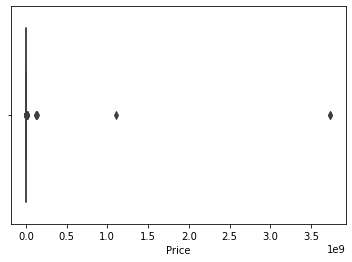

In [64]:
import seaborn as sns
sns.boxplot(x=used_cars_df['Price'])

In [65]:
Q1 = used_cars_df['Price'].quantile(0.25)
Q3 = used_cars_df['Price'].quantile(0.75)
IQR = Q3 - Q1
used_cars_df.loc[((used_cars_df.Price<(Q1-1.5*IQR)) | (used_cars_df.Price>(Q3+1.5*IQR))) , 'Price'] =used_cars_df['Price'].mean()

In [66]:
used_cars_df.head()

,Name,Year,Manufacturer,State,Color,Fuel type,Transmission,Engine,Mileage,Price
0,AMG C 43 Base 4MATIC,2019,Mercedes-Benz,CA,Black,Gasoline,Automatic,6 Cylinders,24076.0,54392.0
1,Terrain SLT,2018,Gmc,TN,Graphite Gray Metallic,Gasoline,Automatic,4 Cylinders,45278.0,26659.0
2,Romeo Stelvio Ti,2018,Alfa,PA,Vulcano Black Metallic,Gasoline,Automatic,4 Cylinders,13690.0,34998.0
3,Aviator Reserve AWD,2020,Lincoln,WI,Blue Diamond,Gasoline,Automatic,6 Cylinders,3104.0,55995.0
4,XC60 T6 Momentum,2021,Volvo,WA,Fusion Red Metallic,Gasoline,Automatic,4 Cylinders,18378.0,46880.0
